In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data=pd.read_csv('../input/bostonhoustingmlnd/housing.csv')   
data.head()

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostonhoustingmlnd/housing.csv


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


# Predicting Boston Housing Prices

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RM,489.0,6.240288,0.643650,3.561,5.88,6.185,6.575,8.398
LSTAT,489.0,12.939632,7.081990,1.980,7.37,11.690,17.120,37.970
PTRATIO,489.0,18.516564,2.111268,12.600,17.40,19.100,20.200,22.000
MEDV,489.0,454342.944785,165340.277653,105000.000,350700.00,438900.000,518700.000,1024800.000


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

1. _Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?_ - As the number of rooms increases, in most of the cases, the Floor Area increases which in-turn increases the price of the house. So, a house that has an `'RM'` value(number of rooms) of 6 will have a lesser worth than a home that has an `'RM'` value of 7. (`'RM` vs `'Price'` is a Positive Correlation)
2. _Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?_ - Usually, high-class socities tend to have a higher home prices. So, as the percent of lower class workers decreases, the price of the house will increase. In this case, a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices worth more than a neighborhood that has an `'LSTAT'` value of 20. (`'LSTAT'` vs `'Price'` is a Negative Correlation)
3. _Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?_ - Usually, the ratio of teachers to students will be less in good schools and these good schools are mostly located in high class neighbours which have houses of high price. So, in our case a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more than a neighborhood that has an `'PTRATIO'` value of 15. (`'PTRATIO'` vs `'Price'` is a Negative Correlation)

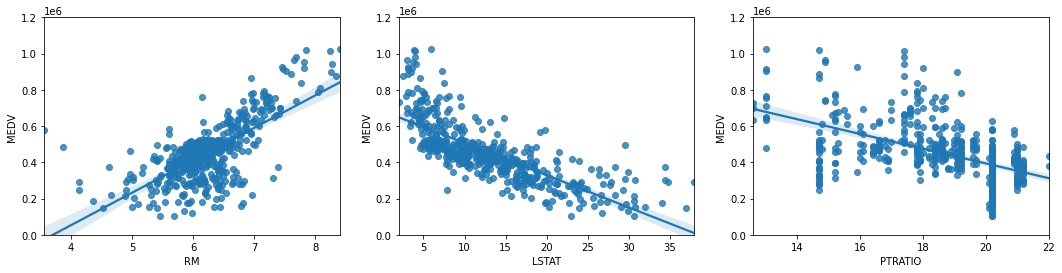

In [7]:
fig, axs = plt.subplots(ncols=3, figsize=(18,4))

for i in range(len(axs)):
    axs[i].set_ylim([0, 1200000])
# RM vs Price
_ = sns.regplot(x=data['RM'], y=data.MEDV, ax=axs[0])
# LSSAT vs Price
_ = sns.regplot(x=data['LSTAT'], y=data.MEDV, ax=axs[1])
# PTRATIO vs Price
_ = sns.regplot(x=data['PTRATIO'], y=data.MEDV, ax=axs[2])

plt.show();


## Developing a Model

In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [8]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [10]:
data = data.dropna()
y = data["MEDV"]
X = data.drop(['MEDV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [12]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [13]:
knn_model

KNeighborsRegressor()

In [14]:
knn_model.n_neighbors

5

In [15]:
knn_model.effective_metric_

'euclidean'

# Prediction

In [16]:
y_pred = knn_model.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred))

66014.27539629259

In [18]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)



k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  49947.98154736323
k = 3 için RMSE değeri:  58932.37603690514
k = 4 için RMSE değeri:  64109.28961035415
k = 5 için RMSE değeri:  67299.14970354138
k = 6 için RMSE değeri:  70257.4674190728
k = 7 için RMSE değeri:  72088.02508500103
k = 8 için RMSE değeri:  73760.01523584586
k = 9 için RMSE değeri:  74829.23729464547
k = 10 için RMSE değeri:  75749.72775474531


# Model Tuning

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [21]:
knn = KNeighborsRegressor()

In [22]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [23]:
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [24]:
knn_cv_model.best_params_["n_neighbors"]

6

In [25]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  98957.48974699706
k = 2 için RMSE değeri:  49947.98154736323 RMSE_CV değeri:  88663.7797212563
k = 3 için RMSE değeri:  58932.37603690514 RMSE_CV değeri:  84542.44140459069
k = 4 için RMSE değeri:  64109.28961035415 RMSE_CV değeri:  84563.69878896985
k = 5 için RMSE değeri:  67299.14970354138 RMSE_CV değeri:  85086.31431383964
k = 6 için RMSE değeri:  70257.4674190728 RMSE_CV değeri:  83763.82169909714
k = 7 için RMSE değeri:  72088.02508500103 RMSE_CV değeri:  84003.80839178855
k = 8 için RMSE değeri:  73760.01523584586 RMSE_CV değeri:  84551.63967073194
k = 9 için RMSE değeri:  74829.23729464547 RMSE_CV değeri:  84721.02345481845
k = 10 için RMSE değeri:  75749.72775474531 RMSE_CV değeri:  84565.957115765


In [26]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [27]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [28]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

65936.06628695993

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64